In [49]:
import pandas as pd
import dataFile
import getNameNumbers
import sqlalchemy
import mysql.connector
import sqlite3

# creating connection
conn = mysql.connector.connect(
  host="3.135.162.69",
  user="chuckwx",
  password="jfr716!!00"
   
)

mycursor = conn.cursor()
mycursor.execute("USE hourlyt;")
pop1 = ("select * from testTempest order by id DESC LIMIT 25;")
#pop1 = ("select @startTime := timeStamp from testTempest order by id DESC LIMIT 1;")
#pop2 = ("SELECT @endTime := DATE_SUB(@startTime, INTERVAL 24 Hour);")
#pop3 = ("SELECT * from testTempest WHERE timeStamp BETWEEN @endTime AND @startTime;")
#popSelect = pop1 + pop2 + pop3

mycursor.execute(pop1)
hours = mycursor.fetchall()

colNames = ['index', 'dtg', 'hourLocal', 'temp']
df = pd.DataFrame(hours, columns = colNames)
df = df.drop(df.columns[[0, 1]], axis = 1)
df = df.iloc[::-1]

   hourLocal temp
24  06:01 PM   58
23  07:01 PM   55
22  08:01 PM   54
21  09:01 PM   52
20  10:01 PM   51
19  11:01 PM   51
18  12:01 AM   52
17  12:41 AM   52
16  01:01 AM   52
15  02:01 AM   51
14  03:01 AM   50
13  04:01 AM   49
12  05:01 AM   49
11  06:01 AM   48
10  07:01 AM   48
9   08:01 AM   49
8   09:01 AM   53
7   10:01 AM   56
6   11:01 AM   57
5   12:01 PM   60
4   01:01 PM   58
3   02:01 PM   59
2   03:01 PM   59
1   04:01 PM   59
0   05:01 PM   60


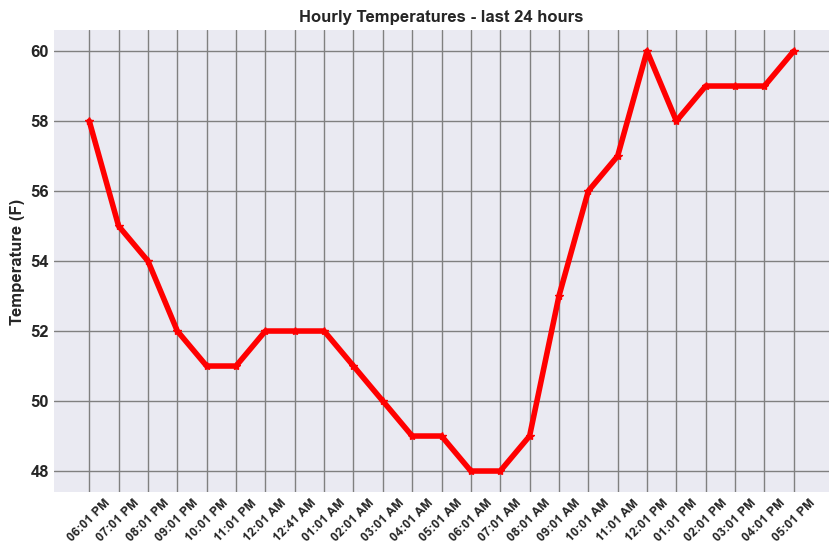

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns

df['temp'] = df['temp'].astype(int)
df['hourLocal'] = df['hourLocal'].astype(str)

t = df['temp']
y = t.to_numpy()
hour = df['hourLocal']
x = hour.to_numpy()

sns.set_style('darkgrid')
    
path1 = '/var/www/html/000/'
plt.figure(figsize= (10,6))
plt.xticks(fontsize = 9, rotation = 45, fontweight = 'bold')
plt.ylabel('Temperature (F)', fontsize=12, fontweight ='bold')
plt.yticks(fontsize = 12, fontweight = 'bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')
plt.plot(x, t, marker = "*", color = "red", linewidth = 4, label = "Temperature")
plt.title('Hourly Temperatures - last 24 hours', fontsize = 12, fontweight = 'bold')
plt.savefig(f'{path1}testFire')       
#plt.show()